In [4]:
import logging
import datetime
import os

import matplotlib.pyplot as plt
import numpy as np
from xcube.core.store import new_data_store

In [2]:
logging.basicConfig(
    level=logging.INFO,
    format="%(asctime)s.%(msecs)03d %(name)s %(levelname)s - %(funcName)s: %(message)s",
    datefmt="%Y-%m-%d %H:%M:%S",
)
logging.getLogger("botocore.httpchecksum").setLevel(logging.WARNING)
LOG = logging.getLogger("deepfeatures_cubgen")

In [3]:
s3_store = new_data_store(
    "s3",
    root=os.environ["S3_USER_STORAGE_BUCKET"],
    max_depth=10,
    storage_options=dict(
        anon=False,
        key=os.environ["S3_USER_STORAGE_KEY"],
        secret=os.environ["S3_USER_STORAGE_SECRET"],
    ),
)

In [4]:
stats = []
for cube_id in range(4606):
    for suffix in range(2):
        data_id = f"cubes/training/0.1.0/{cube_id:04d}_{suffix}.zarr"
        if cube_id % 10 == 0:
            LOG.info(f"Checking {data_id}")
        ds = s3_store.open_data(data_id)
        array = ds["s2l2a"].values.ravel()
        null_size = np.isnan(array).sum()
        perc = (null_size / array.size) * 100
        if perc > 0.1:
            LOG.warning(
                f"{data_id}: Data variable s2l2a has {perc:.3f}% nan values."
            )
            stats.append((data_id, perc))

2025-11-18 17:08:41.739 deepfeatures_cubgen INFO - <module>: Checking cubes/training/0.1.0/0000_0.zarr
2025-11-18 17:08:43.483 deepfeatures_cubgen INFO - <module>: Checking cubes/training/0.1.0/0000_1.zarr
2025-11-18 17:09:01.069 deepfeatures_cubgen INFO - <module>: Checking cubes/training/0.1.0/0010_0.zarr
2025-11-18 17:09:02.056 deepfeatures_cubgen INFO - <module>: Checking cubes/training/0.1.0/0010_1.zarr
2025-11-18 17:09:17.828 deepfeatures_cubgen WARNING - <module>: cubes/training/0.1.0/0019_0.zarr: Data variable s2l2a has 9.559% nan values.
2025-11-18 17:09:18.656 deepfeatures_cubgen WARNING - <module>: cubes/training/0.1.0/0019_1.zarr: Data variable s2l2a has 14.900% nan values.
2025-11-18 17:09:18.657 deepfeatures_cubgen INFO - <module>: Checking cubes/training/0.1.0/0020_0.zarr
2025-11-18 17:09:19.842 deepfeatures_cubgen INFO - <module>: Checking cubes/training/0.1.0/0020_1.zarr
2025-11-18 17:09:22.764 deepfeatures_cubgen WARNING - <module>: cubes/training/0.1.0/0021_1.zarr: D

In [5]:
stats

[('cubes/training/0.1.0/0019_0.zarr', np.float64(9.55893862505996)),
 ('cubes/training/0.1.0/0019_1.zarr', np.float64(14.9001822457378)),
 ('cubes/training/0.1.0/0021_1.zarr', np.float64(0.6404402638970541)),
 ('cubes/training/0.1.0/0040_1.zarr', np.float64(0.16948234784492094)),
 ('cubes/training/0.1.0/0055_0.zarr', np.float64(7.140066516551492)),
 ('cubes/training/0.1.0/0055_1.zarr', np.float64(5.52084647502328)),
 ('cubes/training/0.1.0/0058_0.zarr', np.float64(8.056633095083388)),
 ('cubes/training/0.1.0/0058_1.zarr', np.float64(12.712148243297891)),
 ('cubes/training/0.1.0/0059_1.zarr', np.float64(0.11462879827077359)),
 ('cubes/training/0.1.0/0062_0.zarr', np.float64(1.1069350686208923)),
 ('cubes/training/0.1.0/0062_1.zarr', np.float64(2.9839385780579635)),
 ('cubes/training/0.1.0/0069_0.zarr', np.float64(0.19336741255144033)),
 ('cubes/training/0.1.0/0086_0.zarr', np.float64(8.361264337623675)),
 ('cubes/training/0.1.0/0086_1.zarr', np.float64(6.891835016835017)),
 ('cubes/trai

In [5]:
stats = [('cubes/training/0.1.0/0019_0.zarr', np.float64(9.55893862505996)),
 ('cubes/training/0.1.0/0019_1.zarr', np.float64(14.9001822457378)),
 ('cubes/training/0.1.0/0021_1.zarr', np.float64(0.6404402638970541)),
 ('cubes/training/0.1.0/0040_1.zarr', np.float64(0.16948234784492094)),
 ('cubes/training/0.1.0/0055_0.zarr', np.float64(7.140066516551492)),
 ('cubes/training/0.1.0/0055_1.zarr', np.float64(5.52084647502328)),
 ('cubes/training/0.1.0/0058_0.zarr', np.float64(8.056633095083388)),
 ('cubes/training/0.1.0/0058_1.zarr', np.float64(12.712148243297891)),
 ('cubes/training/0.1.0/0059_1.zarr', np.float64(0.11462879827077359)),
 ('cubes/training/0.1.0/0062_0.zarr', np.float64(1.1069350686208923)),
 ('cubes/training/0.1.0/0062_1.zarr', np.float64(2.9839385780579635)),
 ('cubes/training/0.1.0/0069_0.zarr', np.float64(0.19336741255144033)),
 ('cubes/training/0.1.0/0086_0.zarr', np.float64(8.361264337623675)),
 ('cubes/training/0.1.0/0086_1.zarr', np.float64(6.891835016835017)),
 ('cubes/training/0.1.0/0119_1.zarr', np.float64(3.278688524590164)),
 ('cubes/training/0.1.0/0121_1.zarr', np.float64(0.7692940804051915)),
 ('cubes/training/0.1.0/0123_1.zarr', np.float64(0.5708669270177207)),
 ('cubes/training/0.1.0/0124_0.zarr', np.float64(1.7720327052198397)),
 ('cubes/training/0.1.0/0124_1.zarr', np.float64(5.450105389942788)),
 ('cubes/training/0.1.0/0128_1.zarr', np.float64(1.3699757596256836)),
 ('cubes/training/0.1.0/0137_0.zarr', np.float64(11.216583419721672)),
 ('cubes/training/0.1.0/0137_1.zarr', np.float64(3.193659503124523)),
 ('cubes/training/0.1.0/0156_1.zarr', np.float64(0.6896551724137931)),
 ('cubes/training/0.1.0/0164_0.zarr', np.float64(0.7520808193322813)),
 ('cubes/training/0.1.0/0168_0.zarr', np.float64(0.5235817551117143)),
 ('cubes/training/0.1.0/0188_1.zarr', np.float64(0.1345199842155702)),
 ('cubes/training/0.1.0/0219_0.zarr', np.float64(0.3754304190812127)),
 ('cubes/training/0.1.0/0244_0.zarr', np.float64(0.615281207133059)),
 ('cubes/training/0.1.0/0252_1.zarr', np.float64(1.056338028169014)),
 ('cubes/training/0.1.0/0299_0.zarr', np.float64(2.7027027027027026)),
 ('cubes/training/0.1.0/0308_0.zarr', np.float64(0.14442798353909464)),
 ('cubes/training/0.1.0/0313_0.zarr', np.float64(0.6212069252192709)),
 ('cubes/training/0.1.0/0313_1.zarr', np.float64(0.4911694101508916)),
 ('cubes/training/0.1.0/0317_0.zarr', np.float64(1.6932209987765543)),
 ('cubes/training/0.1.0/0317_1.zarr', np.float64(2.987587515365293)),
 ('cubes/training/0.1.0/0338_0.zarr', np.float64(0.11339268217575096)),
 ('cubes/training/0.1.0/0347_1.zarr', np.float64(1.2605042016806722)),
 ('cubes/training/0.1.0/0350_1.zarr', np.float64(0.7576069335328595)),
 ('cubes/training/0.1.0/0370_0.zarr', np.float64(2.5399932281085587)),
 ('cubes/training/0.1.0/0370_1.zarr', np.float64(2.714718792866941)),
 ('cubes/training/0.1.0/0384_1.zarr', np.float64(0.6725245653817082)),
 ('cubes/training/0.1.0/0394_0.zarr', np.float64(0.7204236610711431)),
 ('cubes/training/0.1.0/0394_1.zarr', np.float64(0.7653300034555336)),
 ('cubes/training/0.1.0/0398_1.zarr', np.float64(1.1701234567901235)),
 ('cubes/training/0.1.0/0424_1.zarr', np.float64(0.5320900096313808)),
 ('cubes/training/0.1.0/0425_0.zarr', np.float64(12.124112178021642)),
 ('cubes/training/0.1.0/0425_1.zarr', np.float64(6.370753182122692)),
 ('cubes/training/0.1.0/0428_1.zarr', np.float64(2.054794520547945)),
 ('cubes/training/0.1.0/0429_1.zarr', np.float64(0.6852908844917978)),
 ('cubes/training/0.1.0/0430_1.zarr', np.float64(1.3700885055527368)),
 ('cubes/training/0.1.0/0441_1.zarr', np.float64(0.2692491202958192)),
 ('cubes/training/0.1.0/0445_0.zarr', np.float64(1.7994354753614012)),
 ('cubes/training/0.1.0/0445_1.zarr', np.float64(1.84302357913469)),
 ('cubes/training/0.1.0/0447_0.zarr', np.float64(2.6551457334285615)),
 ('cubes/training/0.1.0/0447_1.zarr', np.float64(6.269363609641387)),
 ('cubes/training/0.1.0/0463_1.zarr', np.float64(0.684931506849315)),
 ('cubes/training/0.1.0/0469_0.zarr', np.float64(1.4084651944589346)),
 ('cubes/training/0.1.0/0477_0.zarr', np.float64(0.6849878798128418)),
 ('cubes/training/0.1.0/0500_1.zarr', np.float64(0.19067688378033204)),
 ('cubes/training/0.1.0/0524_1.zarr', np.float64(0.41610425240054866)),
 ('cubes/training/0.1.0/0528_1.zarr', np.float64(0.6853120243531202)),
 ('cubes/training/0.1.0/0547_0.zarr', np.float64(0.6850935791194543)),
 ('cubes/training/0.1.0/0562_0.zarr', np.float64(7.329807788818629)),
 ('cubes/training/0.1.0/0562_1.zarr', np.float64(5.114996209659952)),
 ('cubes/training/0.1.0/0577_1.zarr', np.float64(1.36986301369863)),
 ('cubes/training/0.1.0/0598_0.zarr', np.float64(4.25)),
 ('cubes/training/0.1.0/0598_1.zarr', np.float64(1.1232510288065842)),
 ('cubes/training/0.1.0/0599_0.zarr', np.float64(1.9317746208918203)),
 ('cubes/training/0.1.0/0599_1.zarr', np.float64(0.3006740456932028)),
 ('cubes/training/0.1.0/0611_0.zarr', np.float64(0.6897119341563787)),
 ('cubes/training/0.1.0/0611_1.zarr', np.float64(0.3187410766775846)),
 ('cubes/training/0.1.0/0623_1.zarr', np.float64(0.6849878798128418)),
 ('cubes/training/0.1.0/0625_0.zarr', np.float64(6.11233996342021)),
 ('cubes/training/0.1.0/0625_1.zarr', np.float64(5.5726988326194675)),
 ('cubes/training/0.1.0/0630_0.zarr', np.float64(0.3153397161333669)),
 ('cubes/training/0.1.0/0630_1.zarr', np.float64(2.8831875857338822)),
 ('cubes/training/0.1.0/0632_1.zarr', np.float64(0.3238683127572016)),
 ('cubes/training/0.1.0/0653_0.zarr', np.float64(6.269598130366306)),
 ('cubes/training/0.1.0/0653_1.zarr', np.float64(10.16008659122085)),
 ('cubes/training/0.1.0/0700_0.zarr', np.float64(4.929235373679818)),
 ('cubes/training/0.1.0/0700_1.zarr', np.float64(0.6870867035617994)),
 ('cubes/training/0.1.0/0712_1.zarr', np.float64(0.6853683973166469)),
 ('cubes/training/0.1.0/0717_0.zarr', np.float64(3.049575994781474)),
 ('cubes/training/0.1.0/0742_0.zarr', np.float64(11.394290123456791)),
 ('cubes/training/0.1.0/0742_1.zarr', np.float64(9.713217398999955)),
 ('cubes/training/0.1.0/0749_1.zarr', np.float64(1.36986301369863)),
 ('cubes/training/0.1.0/0754_1.zarr', np.float64(0.5545765299349529)),
 ('cubes/training/0.1.0/0756_0.zarr', np.float64(10.763264536801433)),
 ('cubes/training/0.1.0/0756_1.zarr', np.float64(14.698740300945559)),
 ('cubes/training/0.1.0/0787_0.zarr', np.float64(2.9162206106650554)),
 ('cubes/training/0.1.0/0787_1.zarr', np.float64(9.140601063350456)),
 ('cubes/training/0.1.0/0789_0.zarr', np.float64(7.2039653654939455)),
 ('cubes/training/0.1.0/0789_1.zarr', np.float64(13.887084166724142)),
 ('cubes/training/0.1.0/0794_0.zarr', np.float64(3.5526678019015185)),
 ('cubes/training/0.1.0/0794_1.zarr', np.float64(8.211272780717225)),
 ('cubes/training/0.1.0/0795_0.zarr', np.float64(4.146341281757948)),
 ('cubes/training/0.1.0/0795_1.zarr', np.float64(6.641494182112631)),
 ('cubes/training/0.1.0/0804_0.zarr', np.float64(10.513796837773445)),
 ('cubes/training/0.1.0/0804_1.zarr', np.float64(7.82943469785575)),
 ('cubes/training/0.1.0/0817_0.zarr', np.float64(0.9523776863283037)),
 ('cubes/training/0.1.0/0817_1.zarr', np.float64(1.3143263167243984)),
 ('cubes/training/0.1.0/0864_0.zarr', np.float64(2.1972825315737197)),
 ('cubes/training/0.1.0/0864_1.zarr', np.float64(0.10454803462466297)),
 ('cubes/training/0.1.0/0875_0.zarr', np.float64(2.4327214641542128)),
 ('cubes/training/0.1.0/0875_1.zarr', np.float64(5.226676043131739)),
 ('cubes/training/0.1.0/0877_0.zarr', np.float64(0.1992713794464175)),
 ('cubes/training/0.1.0/0902_0.zarr', np.float64(4.153157371931318)),
 ('cubes/training/0.1.0/0902_1.zarr', np.float64(1.1207972901094594)),
 ('cubes/training/0.1.0/0931_0.zarr', np.float64(8.791629027401385)),
 ('cubes/training/0.1.0/0931_1.zarr', np.float64(5.372427983539095)),
 ('cubes/training/0.1.0/0950_0.zarr', np.float64(11.267881105743424)),
 ('cubes/training/0.1.0/0950_1.zarr', np.float64(4.461277207595815)),
 ('cubes/training/0.1.0/0951_0.zarr', np.float64(1.6521009313406974)),
 ('cubes/training/0.1.0/0951_1.zarr', np.float64(2.3869094129291035)),
 ('cubes/training/0.1.0/0958_0.zarr', np.float64(0.19984567901234568)),
 ('cubes/training/0.1.0/1069_0.zarr', np.float64(12.640350877192983)),
 ('cubes/training/0.1.0/1069_1.zarr', np.float64(4.794251384443428)),
 ('cubes/training/0.1.0/1110_0.zarr', np.float64(1.3158553290132238)),
 ('cubes/training/0.1.0/1115_0.zarr', np.float64(0.7501550256496984)),
 ('cubes/training/0.1.0/1115_1.zarr', np.float64(0.5437172332149501)),
 ('cubes/training/0.1.0/1116_1.zarr', np.float64(2.054794520547945)),
 ('cubes/training/0.1.0/1161_0.zarr', np.float64(12.927840932241372)),
 ('cubes/training/0.1.0/1161_1.zarr', np.float64(15.226041012764178)),
 ('cubes/training/0.1.0/1173_1.zarr', np.float64(0.5474752936229011)),
 ('cubes/training/0.1.0/1184_0.zarr', np.float64(11.18204732510288)),
 ('cubes/training/0.1.0/1184_1.zarr', np.float64(7.202297421322202)),
 ('cubes/training/0.1.0/1185_0.zarr', np.float64(1.6393738800775985)),
 ('cubes/training/0.1.0/1185_1.zarr', np.float64(1.3381696036017023)),
 ('cubes/training/0.1.0/1193_0.zarr', np.float64(10.779082980160924)),
 ('cubes/training/0.1.0/1193_1.zarr', np.float64(12.298556553186183)),
 ('cubes/training/0.1.0/1228_0.zarr', np.float64(0.5137409098596313)),
 ('cubes/training/0.1.0/1232_0.zarr', np.float64(0.6956627680311891)),
 ('cubes/training/0.1.0/1252_0.zarr', np.float64(13.655686660111439)),
 ('cubes/training/0.1.0/1252_1.zarr', np.float64(9.6343779677113)),
 ('cubes/training/0.1.0/1259_0.zarr', np.float64(5.388298943854499)),
 ('cubes/training/0.1.0/1259_1.zarr', np.float64(2.17924488415356)),
 ('cubes/training/0.1.0/1303_0.zarr', np.float64(0.48455380799368625)),
 ('cubes/training/0.1.0/1303_1.zarr', np.float64(1.9013543604487286)),
 ('cubes/training/0.1.0/1312_1.zarr', np.float64(0.6944444444444444)),
 ('cubes/training/0.1.0/1335_0.zarr', np.float64(3.11026734168221)),
 ('cubes/training/0.1.0/1335_1.zarr', np.float64(6.922057331303906)),
 ('cubes/training/0.1.0/1336_0.zarr', np.float64(7.289170457006715)),
 ('cubes/training/0.1.0/1336_1.zarr', np.float64(4.131288004422333)),
 ('cubes/training/0.1.0/1364_0.zarr', np.float64(0.35792181069958845)),
 ('cubes/training/0.1.0/1367_0.zarr', np.float64(0.16892024299431707)),
 ('cubes/training/0.1.0/1367_1.zarr', np.float64(3.3878884631758193)),
 ('cubes/training/0.1.0/1411_1.zarr', np.float64(0.21148452979728702)),
 ('cubes/training/0.1.0/1420_0.zarr', np.float64(5.272924494542853)),
 ('cubes/training/0.1.0/1420_1.zarr', np.float64(3.0805041152263373)),
 ('cubes/training/0.1.0/1437_0.zarr', np.float64(0.7410150891632373)),
 ('cubes/training/0.1.0/1453_0.zarr', np.float64(0.8094941956882256)),
 ('cubes/training/0.1.0/1467_0.zarr', np.float64(12.912807083177452)),
 ('cubes/training/0.1.0/1467_1.zarr', np.float64(1.8638207847910508)),
 ('cubes/training/0.1.0/1491_1.zarr', np.float64(0.22481567215363513)),
 ('cubes/training/0.1.0/1498_1.zarr', np.float64(0.3530449216723726)),
 ('cubes/training/0.1.0/1514_1.zarr', np.float64(0.6906555981268625)),
 ('cubes/training/0.1.0/1533_1.zarr', np.float64(0.6993294771072548)),
 ('cubes/training/0.1.0/1595_1.zarr', np.float64(0.7812821502057613)),
 ('cubes/training/0.1.0/1635_1.zarr', np.float64(0.2816076417049653)),
 ('cubes/training/0.1.0/1641_0.zarr', np.float64(0.16665881318128986)),
 ('cubes/training/0.1.0/1655_0.zarr', np.float64(5.128929165572192)),
 ('cubes/training/0.1.0/1655_1.zarr', np.float64(7.868575760388626)),
 ('cubes/training/0.1.0/1670_0.zarr', np.float64(7.158264746227709)),
 ('cubes/training/0.1.0/1670_1.zarr', np.float64(4.327303745376883)),
 ('cubes/training/0.1.0/1730_0.zarr', np.float64(0.7093410000563729)),
 ('cubes/training/0.1.0/1730_1.zarr', np.float64(1.486301764079542)),
 ('cubes/training/0.1.0/1749_0.zarr', np.float64(14.572120139088272)),
 ('cubes/training/0.1.0/1749_1.zarr', np.float64(3.970437885802469)),
 ('cubes/training/0.1.0/1761_0.zarr', np.float64(9.420486808945034)),
 ('cubes/training/0.1.0/1761_1.zarr', np.float64(4.636176580621025)),
 ('cubes/training/0.1.0/1773_0.zarr', np.float64(4.523274051051828)),
 ('cubes/training/0.1.0/1773_1.zarr', np.float64(5.639290196421796)),
 ('cubes/training/0.1.0/1794_0.zarr', np.float64(0.6900950759188307)),
 ('cubes/training/0.1.0/1813_0.zarr', np.float64(0.5412398213816654)),
 ('cubes/training/0.1.0/1813_1.zarr', np.float64(2.4585976794695927)),
 ('cubes/training/0.1.0/1837_0.zarr', np.float64(8.483395540243086)),
 ('cubes/training/0.1.0/1837_1.zarr', np.float64(4.425490196078432)),
 ('cubes/training/0.1.0/1839_0.zarr', np.float64(3.507342650038645)),
 ('cubes/training/0.1.0/1839_1.zarr', np.float64(0.7762952411100559)),
 ('cubes/training/0.1.0/1840_0.zarr', np.float64(1.3701166920345003)),
 ('cubes/training/0.1.0/1858_1.zarr', np.float64(0.7052541586970382)),
 ('cubes/training/0.1.0/1866_0.zarr', np.float64(0.3707002167561964)),
 ('cubes/training/0.1.0/1891_1.zarr', np.float64(0.6944730224051212)),
 ('cubes/training/0.1.0/1897_1.zarr', np.float64(1.4127997729530297)),
 ('cubes/training/0.1.0/1906_1.zarr', np.float64(1.3699757596256836)),
 ('cubes/training/0.1.0/1912_0.zarr', np.float64(0.7463607886493459)),
 ('cubes/training/0.1.0/1927_1.zarr', np.float64(0.36778445111778446)),
 ('cubes/training/0.1.0/1971_0.zarr', np.float64(0.9714148948331048)),
 ('cubes/training/0.1.0/1971_1.zarr', np.float64(1.1513115534279557)),
 ('cubes/training/0.1.0/1972_1.zarr', np.float64(0.6897119341563787)),
 ('cubes/training/0.1.0/2007_1.zarr', np.float64(0.5397089735618912)),
 ('cubes/training/0.1.0/2031_1.zarr', np.float64(0.22620540921194518)),
 ('cubes/training/0.1.0/2034_0.zarr', np.float64(1.5743190280227317)),
 ('cubes/training/0.1.0/2034_1.zarr', np.float64(2.2426849421600075)),
 ('cubes/training/0.1.0/2037_0.zarr', np.float64(1.3178503035488736)),
 ('cubes/training/0.1.0/2037_1.zarr', np.float64(5.437925274008883)),
 ('cubes/training/0.1.0/2062_0.zarr', np.float64(1.12663739639483)),
 ('cubes/training/0.1.0/2062_1.zarr', np.float64(6.170421435222733)),
 ('cubes/training/0.1.0/2075_0.zarr', np.float64(0.7345395203632752)),
 ('cubes/training/0.1.0/2075_1.zarr', np.float64(2.0704696538029874)),
 ('cubes/training/0.1.0/2084_1.zarr', np.float64(0.684931506849315)),
 ('cubes/training/0.1.0/2112_0.zarr', np.float64(4.8488012166756125)),
 ('cubes/training/0.1.0/2112_1.zarr', np.float64(3.585731466991248)),
 ('cubes/training/0.1.0/2122_0.zarr', np.float64(0.690485312899106)),
 ('cubes/training/0.1.0/2177_1.zarr', np.float64(1.0155589379333672)),
 ('cubes/training/0.1.0/2194_0.zarr', np.float64(1.2346152026867225)),
 ('cubes/training/0.1.0/2217_0.zarr', np.float64(0.3865979381443299)),
 ('cubes/training/0.1.0/2225_0.zarr', np.float64(0.8263648834019205)),
 ('cubes/training/0.1.0/2225_1.zarr', np.float64(3.435425685425685)),
 ('cubes/training/0.1.0/2226_1.zarr', np.float64(0.8)),
 ('cubes/training/0.1.0/2243_0.zarr', np.float64(0.5823902606310014)),
 ('cubes/training/0.1.0/2243_1.zarr', np.float64(1.5595004966652475)),
 ('cubes/training/0.1.0/2246_0.zarr', np.float64(0.2594238683127572)),
 ('cubes/training/0.1.0/2253_0.zarr', np.float64(0.27036327515254716)),
 ('cubes/training/0.1.0/2253_1.zarr', np.float64(2.2779349565614995)),
 ('cubes/training/0.1.0/2282_0.zarr', np.float64(10.919621749408984)),
 ('cubes/training/0.1.0/2282_1.zarr', np.float64(2.2392887371216768)),
 ('cubes/training/0.1.0/2301_0.zarr', np.float64(1.1236605285060342)),
 ('cubes/training/0.1.0/2301_1.zarr', np.float64(2.222740675934027)),
 ('cubes/training/0.1.0/2308_0.zarr', np.float64(10.038371705038372)),
 ('cubes/training/0.1.0/2308_1.zarr', np.float64(8.791660886854395)),
 ('cubes/training/0.1.0/2317_0.zarr', np.float64(4.29692457512644)),
 ('cubes/training/0.1.0/2317_1.zarr', np.float64(19.556483802097837)),
 ('cubes/training/0.1.0/2321_0.zarr', np.float64(1.0279187101865945)),
 ('cubes/training/0.1.0/2326_1.zarr', np.float64(1.3700321325892102)),
 ('cubes/training/0.1.0/2329_0.zarr', np.float64(3.776799332354888)),
 ('cubes/training/0.1.0/2329_1.zarr', np.float64(5.558156552483625)),
 ('cubes/training/0.1.0/2338_1.zarr', np.float64(0.7759434714645739)),
 ('cubes/training/0.1.0/2340_1.zarr', np.float64(1.4386506389430367)),
 ('cubes/training/0.1.0/2349_1.zarr', np.float64(0.5102110803169004)),
 ('cubes/training/0.1.0/2359_0.zarr', np.float64(1.8187075964853743)),
 ('cubes/training/0.1.0/2359_1.zarr', np.float64(5.8713477366255145)),
 ('cubes/training/0.1.0/2363_0.zarr', np.float64(0.14129268815946014)),
 ('cubes/training/0.1.0/2363_1.zarr', np.float64(0.5836370762296688)),
 ('cubes/training/0.1.0/2380_0.zarr', np.float64(8.9088897738838)),
 ('cubes/training/0.1.0/2380_1.zarr', np.float64(12.325933145621255)),
 ('cubes/training/0.1.0/2389_0.zarr', np.float64(0.6944730224051212)),
 ('cubes/training/0.1.0/2394_0.zarr', np.float64(7.3156558233718725)),
 ('cubes/training/0.1.0/2394_1.zarr', np.float64(4.981504863449308)),
 ('cubes/training/0.1.0/2410_0.zarr', np.float64(0.42398262459990854)),
 ('cubes/training/0.1.0/2410_1.zarr', np.float64(0.8695881955014375)),
 ('cubes/training/0.1.0/2423_0.zarr', np.float64(10.721844411894633)),
 ('cubes/training/0.1.0/2423_1.zarr', np.float64(6.250178687459389)),
 ('cubes/training/0.1.0/2428_0.zarr', np.float64(6.598887118899066)),
 ('cubes/training/0.1.0/2428_1.zarr', np.float64(2.5051104848810164)),
 ('cubes/training/0.1.0/2430_0.zarr', np.float64(1.6146626078132928)),
 ('cubes/training/0.1.0/2455_0.zarr', np.float64(2.702988646645069)),
 ('cubes/training/0.1.0/2455_1.zarr', np.float64(7.9185332157554384)),
 ('cubes/training/0.1.0/2467_0.zarr', np.float64(5.578047018649856)),
 ('cubes/training/0.1.0/2467_1.zarr', np.float64(11.919624485596708)),
 ('cubes/training/0.1.0/2468_0.zarr', np.float64(3.516235069758105)),
 ('cubes/training/0.1.0/2468_1.zarr', np.float64(2.4444985921594107)),
 ('cubes/training/0.1.0/2507_0.zarr', np.float64(3.508956262471256)),
 ('cubes/training/0.1.0/2507_1.zarr', np.float64(3.5103741087879516)),
 ('cubes/training/0.1.0/2523_0.zarr', np.float64(0.7578875171467764)),
 ('cubes/training/0.1.0/2529_1.zarr', np.float64(0.8650560522208032)),
 ('cubes/training/0.1.0/2533_0.zarr', np.float64(6.729063194740078)),
 ('cubes/training/0.1.0/2533_1.zarr', np.float64(13.604787451791525)),
 ('cubes/training/0.1.0/2549_0.zarr', np.float64(0.9626400528671413)),
 ('cubes/training/0.1.0/2549_1.zarr', np.float64(1.1184140790622272)),
 ('cubes/training/0.1.0/2575_0.zarr', np.float64(5.2646446171823404)),
 ('cubes/training/0.1.0/2575_1.zarr', np.float64(2.9998628257887514)),
 ('cubes/training/0.1.0/2585_0.zarr', np.float64(0.7143151087595532)),
 ('cubes/training/0.1.0/2595_0.zarr', np.float64(13.370197530864198)),
 ('cubes/training/0.1.0/2595_1.zarr', np.float64(8.747465622804377)),
 ('cubes/training/0.1.0/2599_0.zarr', np.float64(6.147925495976906)),
 ('cubes/training/0.1.0/2599_1.zarr', np.float64(7.115303983228512)),
 ('cubes/training/0.1.0/2601_0.zarr', np.float64(1.5258215962441315)),
 ('cubes/training/0.1.0/2628_0.zarr', np.float64(11.106000265498475)),
 ('cubes/training/0.1.0/2628_1.zarr', np.float64(17.09042855115652)),
 ('cubes/training/0.1.0/2660_1.zarr', np.float64(0.6857348215795704)),
 ('cubes/training/0.1.0/2661_1.zarr', np.float64(0.6852838378713569)),
 ('cubes/training/0.1.0/2681_0.zarr', np.float64(2.5000951293759512)),
 ('cubes/training/0.1.0/2690_0.zarr', np.float64(8.259931132947006)),
 ('cubes/training/0.1.0/2690_1.zarr', np.float64(7.19344705180159)),
 ('cubes/training/0.1.0/2693_1.zarr', np.float64(0.6946087677183357)),
 ('cubes/training/0.1.0/2694_1.zarr', np.float64(0.4230315500685871)),
 ('cubes/training/0.1.0/2741_0.zarr', np.float64(0.1800965969295976)),
 ('cubes/training/0.1.0/2773_0.zarr', np.float64(0.6852133716669486)),
 ('cubes/training/0.1.0/2785_0.zarr', np.float64(2.8169014084507045)),
 ('cubes/training/0.1.0/2785_1.zarr', np.float64(0.684931506849315)),
 ('cubes/training/0.1.0/2786_0.zarr', np.float64(1.2904988321654989)),
 ('cubes/training/0.1.0/2795_0.zarr', np.float64(15.142365172189734)),
 ('cubes/training/0.1.0/2795_1.zarr', np.float64(7.2936644654990905)),
 ('cubes/training/0.1.0/2797_1.zarr', np.float64(1.3616398033836306)),
 ('cubes/training/0.1.0/2809_0.zarr', np.float64(2.2511645518975767)),
 ('cubes/training/0.1.0/2809_1.zarr', np.float64(0.5391939832552859)),
 ('cubes/training/0.1.0/2815_1.zarr', np.float64(0.7130651139713393)),
 ('cubes/training/0.1.0/2830_0.zarr', np.float64(9.191619397174952)),
 ('cubes/training/0.1.0/2830_1.zarr', np.float64(8.362823993277747)),
 ('cubes/training/0.1.0/2849_0.zarr', np.float64(0.6944730224051212)),
 ('cubes/training/0.1.0/2863_0.zarr', np.float64(3.6364008408207305)),
 ('cubes/training/0.1.0/2871_0.zarr', np.float64(0.25218423551756886)),
 ('cubes/training/0.1.0/2874_0.zarr', np.float64(0.6905917411664538)),
 ('cubes/training/0.1.0/2907_0.zarr', np.float64(0.14081912600431118)),
 ('cubes/training/0.1.0/2907_1.zarr', np.float64(2.677844650205761)),
 ('cubes/training/0.1.0/2939_1.zarr', np.float64(0.7473051409618574)),
 ('cubes/training/0.1.0/2950_0.zarr', np.float64(0.7142857142857143)),
 ('cubes/training/0.1.0/2985_0.zarr', np.float64(7.132912386517136)),
 ('cubes/training/0.1.0/2985_1.zarr', np.float64(12.835967847390483)),
 ('cubes/training/0.1.0/3023_1.zarr', np.float64(1.1450381679389312)),
 ('cubes/training/0.1.0/3025_1.zarr', np.float64(0.6807648644813395)),
 ('cubes/training/0.1.0/3031_1.zarr', np.float64(1.1231787342898454)),
 ('cubes/training/0.1.0/3036_0.zarr', np.float64(11.727409573316006)),
 ('cubes/training/0.1.0/3036_1.zarr', np.float64(11.54374369128038)),
 ('cubes/training/0.1.0/3061_0.zarr', np.float64(0.9154988321654989)),
 ('cubes/training/0.1.0/3061_1.zarr', np.float64(1.1205704160951073)),
 ('cubes/training/0.1.0/3063_0.zarr', np.float64(5.528865711177334)),
 ('cubes/training/0.1.0/3063_1.zarr', np.float64(10.692754262198706)),
 ('cubes/training/0.1.0/3067_0.zarr', np.float64(0.9512937595129376)),
 ('cubes/training/0.1.0/3067_1.zarr', np.float64(0.13949617055326932)),
 ('cubes/training/0.1.0/3075_0.zarr', np.float64(1.3889460448102424)),
 ('cubes/training/0.1.0/3115_0.zarr', np.float64(0.5379972565157751)),
 ('cubes/training/0.1.0/3120_0.zarr', np.float64(0.15921154649012942)),
 ('cubes/training/0.1.0/3140_1.zarr', np.float64(1.3513513513513513)),
 ('cubes/training/0.1.0/3145_0.zarr', np.float64(4.567934691692596)),
 ('cubes/training/0.1.0/3145_1.zarr', np.float64(0.19610196616369457)),
 ('cubes/training/0.1.0/3177_0.zarr', np.float64(9.95153546617107)),
 ('cubes/training/0.1.0/3177_1.zarr', np.float64(8.462011802158553)),
 ('cubes/training/0.1.0/3216_0.zarr', np.float64(1.0344827586206897)),
 ('cubes/training/0.1.0/3239_1.zarr', np.float64(0.73880658436214)),
 ('cubes/training/0.1.0/3255_0.zarr', np.float64(15.85136220593737)),
 ('cubes/training/0.1.0/3255_1.zarr', np.float64(12.052308570613002)),
 ('cubes/training/0.1.0/3264_1.zarr', np.float64(0.6945016003657979)),
 ('cubes/training/0.1.0/3297_0.zarr', np.float64(7.218901295085936)),
 ('cubes/training/0.1.0/3297_1.zarr', np.float64(3.818403091438322)),
 ('cubes/training/0.1.0/3308_0.zarr', np.float64(3.8376651505306474)),
 ('cubes/training/0.1.0/3308_1.zarr', np.float64(0.569235902569236)),
 ('cubes/training/0.1.0/3314_0.zarr', np.float64(16.043369691158258)),
 ('cubes/training/0.1.0/3314_1.zarr', np.float64(11.126871071315515)),
 ('cubes/training/0.1.0/3348_0.zarr', np.float64(7.222479423868313)),
 ('cubes/training/0.1.0/3348_1.zarr', np.float64(2.586649880875027)),
 ('cubes/training/0.1.0/3416_0.zarr', np.float64(11.169907960529226)),
 ('cubes/training/0.1.0/3416_1.zarr', np.float64(9.023941980389168)),
 ('cubes/training/0.1.0/3429_1.zarr', np.float64(0.684931506849315)),
 ('cubes/training/0.1.0/3431_0.zarr', np.float64(1.2670739613281472)),
 ('cubes/training/0.1.0/3431_1.zarr', np.float64(6.87349995683329)),
 ('cubes/training/0.1.0/3432_1.zarr', np.float64(1.3514069625180738)),
 ('cubes/training/0.1.0/3434_0.zarr', np.float64(0.6802721088435374)),
 ('cubes/training/0.1.0/3441_0.zarr', np.float64(2.256886145404664)),
 ('cubes/training/0.1.0/3441_1.zarr', np.float64(2.8176242481798037)),
 ('cubes/training/0.1.0/3444_0.zarr', np.float64(0.6850442527763684)),
 ('cubes/training/0.1.0/3448_0.zarr', np.float64(2.3255813953488373)),
 ('cubes/training/0.1.0/3495_1.zarr', np.float64(1.3702858109250804)),
 ('cubes/training/0.1.0/3497_0.zarr', np.float64(0.3627612761276128)),
 ('cubes/training/0.1.0/3497_1.zarr', np.float64(1.010896499845126)),
 ('cubes/training/0.1.0/3499_0.zarr', np.float64(3.226021505376344)),
 ('cubes/training/0.1.0/3499_1.zarr', np.float64(3.22606999789163)),
 ('cubes/training/0.1.0/3521_0.zarr', np.float64(0.29653371320037986)),
 ('cubes/training/0.1.0/3522_0.zarr', np.float64(7.227658652804851)),
 ('cubes/training/0.1.0/3522_1.zarr', np.float64(8.59321235559522)),
 ('cubes/training/0.1.0/3524_1.zarr', np.float64(1.041680955647005)),
 ('cubes/training/0.1.0/3537_1.zarr', np.float64(0.7541152263374485)),
 ('cubes/training/0.1.0/3562_0.zarr', np.float64(1.041680955647005)),
 ('cubes/training/0.1.0/3585_1.zarr', np.float64(0.6900525046118916)),
 ('cubes/training/0.1.0/3596_0.zarr', np.float64(5.271583834546798)),
 ('cubes/training/0.1.0/3596_1.zarr', np.float64(8.358723608874575)),
 ('cubes/training/0.1.0/3604_0.zarr', np.float64(3.885673868312757)),
 ('cubes/training/0.1.0/3604_1.zarr', np.float64(1.6199108367626887)),
 ('cubes/training/0.1.0/3608_0.zarr', np.float64(1.0273972602739725)),
 ('cubes/training/0.1.0/3609_1.zarr', np.float64(0.6898254576415496)),
 ('cubes/training/0.1.0/3612_0.zarr', np.float64(0.6896835532850859)),
 ('cubes/training/0.1.0/3616_1.zarr', np.float64(2.069000993330495)),
 ('cubes/training/0.1.0/3621_0.zarr', np.float64(0.11803890221156409)),
 ('cubes/training/0.1.0/3639_0.zarr', np.float64(11.489083219021492)),
 ('cubes/training/0.1.0/3639_1.zarr', np.float64(14.064929126657521)),
 ('cubes/training/0.1.0/3653_0.zarr', np.float64(2.7583354329386074)),
 ('cubes/training/0.1.0/3653_1.zarr', np.float64(1.3100267197160298)),
 ('cubes/training/0.1.0/3661_0.zarr', np.float64(0.5137056767574272)),
 ('cubes/training/0.1.0/3734_0.zarr', np.float64(5.990636116342331)),
 ('cubes/training/0.1.0/3734_1.zarr', np.float64(2.8875053214133675)),
 ('cubes/training/0.1.0/3746_0.zarr', np.float64(6.767764060356653)),
 ('cubes/training/0.1.0/3746_1.zarr', np.float64(13.060291948132619)),
 ('cubes/training/0.1.0/3781_0.zarr', np.float64(0.6803001035805268)),
 ('cubes/training/0.1.0/3795_1.zarr', np.float64(0.6896835532850859)),
 ('cubes/training/0.1.0/3841_0.zarr', np.float64(1.1386778516408145)),
 ('cubes/training/0.1.0/3841_1.zarr', np.float64(14.000868350511572)),
 ('cubes/training/0.1.0/3844_1.zarr', np.float64(1.428747795414462)),
 ('cubes/training/0.1.0/3869_0.zarr', np.float64(5.6437757201646095)),
 ('cubes/training/0.1.0/3869_1.zarr', np.float64(3.2057408770065132)),
 ('cubes/training/0.1.0/3950_1.zarr', np.float64(0.5031226089294208)),
 ('cubes/training/0.1.0/3954_0.zarr', np.float64(0.2126315685343463)),
 ('cubes/training/0.1.0/3954_1.zarr', np.float64(1.061653377914952)),
 ('cubes/training/0.1.0/3976_1.zarr', np.float64(0.1827307466196355)),
 ('cubes/training/0.1.0/3989_0.zarr', np.float64(0.37389368059078865)),
 ('cubes/training/0.1.0/3989_1.zarr', np.float64(0.351490379268157)),
 ('cubes/training/0.1.0/3994_1.zarr', np.float64(0.10343792866941016)),
 ('cubes/training/0.1.0/3998_0.zarr', np.float64(0.6993006993006993)),
 ('cubes/training/0.1.0/3998_1.zarr', np.float64(1.4844058289644286)),
 ('cubes/training/0.1.0/4015_0.zarr', np.float64(0.9759780709171881)),
 ('cubes/training/0.1.0/4015_1.zarr', np.float64(2.516869609335363)),
 ('cubes/training/0.1.0/4069_0.zarr', np.float64(15.513112240781085)),
 ('cubes/training/0.1.0/4069_1.zarr', np.float64(10.046321698928008)),
 ('cubes/training/0.1.0/4075_1.zarr', np.float64(1.0135135135135136)),
 ('cubes/training/0.1.0/4100_0.zarr', np.float64(0.6130018907796685)),
 ('cubes/training/0.1.0/4100_1.zarr', np.float64(5.813005106847142)),
 ('cubes/training/0.1.0/4103_0.zarr', np.float64(8.339793950905063)),
 ('cubes/training/0.1.0/4103_1.zarr', np.float64(9.088485280151946)),
 ('cubes/training/0.1.0/4125_1.zarr', np.float64(0.5347523768979708)),
 ('cubes/training/0.1.0/4137_0.zarr', np.float64(2.7559189781412003)),
 ('cubes/training/0.1.0/4137_1.zarr', np.float64(0.456762317873429)),
 ('cubes/training/0.1.0/4149_1.zarr', np.float64(1.1236041036858198)),
 ('cubes/training/0.1.0/4172_0.zarr', np.float64(3.451562878237715)),
 ('cubes/training/0.1.0/4172_1.zarr', np.float64(6.7894325793758075)),
 ('cubes/training/0.1.0/4174_0.zarr', np.float64(9.774056391460906)),
 ('cubes/training/0.1.0/4174_1.zarr', np.float64(11.86126867608349)),
 ('cubes/training/0.1.0/4175_1.zarr', np.float64(1.0274395399966176)),
 ('cubes/training/0.1.0/4185_0.zarr', np.float64(0.14316730523627075)),
 ('cubes/training/0.1.0/4198_0.zarr', np.float64(0.9695930498399634)),
 ('cubes/training/0.1.0/4207_0.zarr', np.float64(5.6466229244007025)),
 ('cubes/training/0.1.0/4207_1.zarr', np.float64(8.651657255877755)),
 ('cubes/training/0.1.0/4225_0.zarr', np.float64(0.9585974863752641)),
 ('cubes/training/0.1.0/4225_1.zarr', np.float64(3.9816507787675155)),
 ('cubes/training/0.1.0/4234_0.zarr', np.float64(10.90822007815472)),
 ('cubes/training/0.1.0/4234_1.zarr', np.float64(12.049209550584688)),
 ('cubes/training/0.1.0/4257_0.zarr', np.float64(1.5251951184901378)),
 ('cubes/training/0.1.0/4266_0.zarr', np.float64(2.227023319615912)),
 ('cubes/training/0.1.0/4266_1.zarr', np.float64(0.7831050228310501)),
 ('cubes/training/0.1.0/4315_0.zarr', np.float64(1.3907464563328762)),
 ('cubes/training/0.1.0/4328_0.zarr', np.float64(0.34422856371854554)),
 ('cubes/training/0.1.0/4343_0.zarr', np.float64(1.027425446755736)),
 ('cubes/training/0.1.0/4366_0.zarr', np.float64(0.1490219290828119)),
 ('cubes/training/0.1.0/4366_1.zarr', np.float64(1.9238399318859087)),
 ('cubes/training/0.1.0/4401_1.zarr', np.float64(0.29676783264746226)),
 ('cubes/training/0.1.0/4421_0.zarr', np.float64(7.878298656076434)),
 ('cubes/training/0.1.0/4421_1.zarr', np.float64(9.850724476971982)),
 ('cubes/training/0.1.0/4441_0.zarr', np.float64(0.5051440329218106)),
 ('cubes/training/0.1.0/4444_0.zarr', np.float64(0.32126436781609197)),
 ('cubes/training/0.1.0/4445_0.zarr', np.float64(1.1253152946571887)),
 ('cubes/training/0.1.0/4454_0.zarr', np.float64(1.0582091670214275)),
 ('cubes/training/0.1.0/4454_1.zarr', np.float64(5.6675875564764455)),
 ('cubes/training/0.1.0/4479_0.zarr', np.float64(6.70164609053498)),
 ('cubes/training/0.1.0/4479_1.zarr', np.float64(3.5073159579332422)),
 ('cubes/training/0.1.0/4498_1.zarr', np.float64(2.2042895518975767)),
 ('cubes/training/0.1.0/4499_0.zarr', np.float64(0.3887186036611324)),
 ('cubes/training/0.1.0/4515_0.zarr', np.float64(2.212483792772986)),
 ('cubes/training/0.1.0/4515_1.zarr', np.float64(4.063454697635489)),
 ('cubes/training/0.1.0/4522_1.zarr', np.float64(0.2618457659537472)),
 ('cubes/training/0.1.0/4535_0.zarr', np.float64(0.1616369455875629)),
 ('cubes/training/0.1.0/4545_0.zarr', np.float64(3.7737413561125193)),
 ('cubes/training/0.1.0/4545_1.zarr', np.float64(3.7735849056603774)),
 ('cubes/training/0.1.0/4577_0.zarr', np.float64(1.0501992292115747)),
 ('cubes/training/0.1.0/4577_1.zarr', np.float64(6.88876785282014)),
 ('cubes/training/0.1.0/4584_1.zarr', np.float64(0.7694523583412471)),
 ('cubes/training/0.1.0/4585_1.zarr', np.float64(0.18397151491769548))]

In [6]:
len(stats)

445

Text(0, 0.5, 'Count')

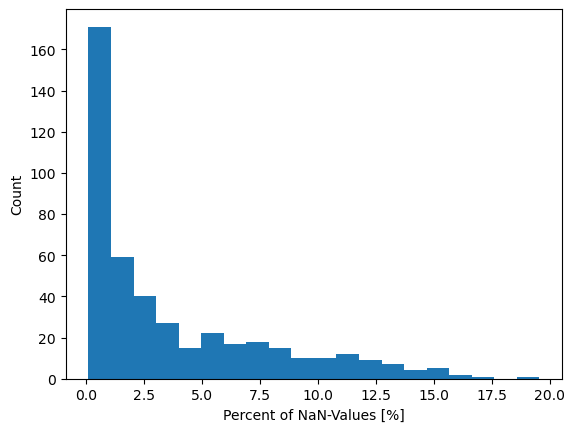

In [7]:
percs = [p for (_, p) in stats]
plt.hist(percs, bins=20)
plt.xlabel("Percent of NaN-Values [%]")
plt.ylabel("Count") 

In [7]:
data_ids = s3_store.list_data_ids()
data_ids = [data_id for data_id in data_ids if "cubes/temp/training/" in data_id]
data_ids

['cubes/temp/training/0.1.0/0000_0.zarr',
 'cubes/temp/training/0.1.0/0000_1.zarr',
 'cubes/temp/training/0.1.0/0001_0.zarr',
 'cubes/temp/training/0.1.0/0001_1.zarr',
 'cubes/temp/training/0.1.0/0002_0.zarr',
 'cubes/temp/training/0.1.0/0002_1.zarr',
 'cubes/temp/training/0.1.0/0003_0.zarr',
 'cubes/temp/training/0.1.0/0003_1.zarr',
 'cubes/temp/training/0.1.0/0004_0.zarr',
 'cubes/temp/training/0.1.0/0004_1.zarr',
 'cubes/temp/training/0.1.0/0005_0.zarr',
 'cubes/temp/training/0.1.0/0005_1.zarr',
 'cubes/temp/training/0.1.0/0006_0.zarr',
 'cubes/temp/training/0.1.0/0006_1.zarr',
 'cubes/temp/training/0.1.0/0007_0.zarr',
 'cubes/temp/training/0.1.0/0007_1.zarr',
 'cubes/temp/training/0.1.0/0008_0.zarr',
 'cubes/temp/training/0.1.0/0008_1.zarr',
 'cubes/temp/training/0.1.0/0009_0.zarr',
 'cubes/temp/training/0.1.0/0009_1.zarr',
 'cubes/temp/training/0.1.0/0010_0.zarr',
 'cubes/temp/training/0.1.0/0010_1.zarr',
 'cubes/temp/training/0.1.0/0011_0.zarr',
 'cubes/temp/training/0.1.0/0011_1

In [11]:
len(data_ids)

9212

In [12]:
cube_ids = [data_id.split("/")[-1] for data_id in data_ids]
not_done = [f"{i:04d}_{j}.zarr" for i in range(4606) for j in range(2) if f"{i:04d}_{j}.zarr" not in cube_ids]
not_done

['0000_0.zarr',
 '0000_1.zarr',
 '0001_0.zarr',
 '0001_1.zarr',
 '0002_0.zarr',
 '0002_1.zarr',
 '0003_0.zarr',
 '0003_1.zarr',
 '0004_0.zarr',
 '0004_1.zarr',
 '0005_0.zarr',
 '0005_1.zarr',
 '0006_0.zarr',
 '0006_1.zarr',
 '0007_0.zarr',
 '0007_1.zarr',
 '0008_0.zarr',
 '0008_1.zarr',
 '0009_0.zarr',
 '0009_1.zarr',
 '0010_0.zarr',
 '0010_1.zarr',
 '0011_0.zarr',
 '0011_1.zarr',
 '0012_0.zarr',
 '0012_1.zarr',
 '0013_0.zarr',
 '0013_1.zarr',
 '0014_0.zarr',
 '0014_1.zarr',
 '0015_0.zarr',
 '0015_1.zarr',
 '0016_0.zarr',
 '0016_1.zarr',
 '0017_0.zarr',
 '0017_1.zarr',
 '0018_0.zarr',
 '0018_1.zarr',
 '0019_0.zarr',
 '0019_1.zarr',
 '0020_0.zarr',
 '0020_1.zarr',
 '0021_0.zarr',
 '0021_1.zarr',
 '0022_0.zarr',
 '0022_1.zarr',
 '0023_0.zarr',
 '0023_1.zarr',
 '0024_0.zarr',
 '0024_1.zarr',
 '0025_0.zarr',
 '0025_1.zarr',
 '0026_0.zarr',
 '0026_1.zarr',
 '0027_0.zarr',
 '0027_1.zarr',
 '0028_0.zarr',
 '0028_1.zarr',
 '0029_0.zarr',
 '0029_1.zarr',
 '0030_0.zarr',
 '0030_1.zarr',
 '0031_0

In [8]:
data_ids = []
for cube_id in range(4606):
    for suffix in range(2):
        data_id = f"cubes/temp/training/0.1.0/{cube_id:04d}_{suffix}.zarr"
        LOG.info(f"Checking {data_id}")
        ds = s3_store.open_data(data_id)
        found_nan = False
        for key in ds.keys():
            if key in ["solar_angle", "viewing_angle"]:
                continue
            for i in range(0, ds.sizes["time"], 15):
                array = ds[key].isel(time=i).values.ravel()
                null_size = np.isnan(array).sum()
                perc = (null_size / array.size) * 100
                if perc >= 99:
                    LOG.warning(
                        f"Data variable {key} has {perc:.3f}% nan values for time slice {i}."
                    )
                    data_ids.append(data_id)
                    found_nan = True
                    break
            if found_nan:
                break
data_ids

2025-11-13 10:18:29.984 deepfeatures_cubgen INFO - <module>: Checking cubes/temp/training/0.1.0/0000_0.zarr
2025-11-13 10:18:36.856 deepfeatures_cubgen INFO - <module>: Checking cubes/temp/training/0.1.0/0000_1.zarr
2025-11-13 10:18:43.139 deepfeatures_cubgen INFO - <module>: Checking cubes/temp/training/0.1.0/0001_0.zarr
2025-11-13 10:18:50.182 deepfeatures_cubgen INFO - <module>: Checking cubes/temp/training/0.1.0/0001_1.zarr
2025-11-13 10:18:57.600 deepfeatures_cubgen INFO - <module>: Checking cubes/temp/training/0.1.0/0002_0.zarr
2025-11-13 10:19:06.228 deepfeatures_cubgen INFO - <module>: Checking cubes/temp/training/0.1.0/0002_1.zarr
2025-11-13 10:19:15.351 deepfeatures_cubgen INFO - <module>: Checking cubes/temp/training/0.1.0/0003_0.zarr
2025-11-13 10:19:24.452 deepfeatures_cubgen INFO - <module>: Checking cubes/temp/training/0.1.0/0003_1.zarr
2025-11-13 10:19:33.134 deepfeatures_cubgen INFO - <module>: Checking cubes/temp/training/0.1.0/0004_0.zarr
2025-11-13 10:19:39.639 deep

['cubes/temp/training/0.1.0/0086_1.zarr',
 'cubes/temp/training/0.1.0/0468_1.zarr',
 'cubes/temp/training/0.1.0/0498_0.zarr',
 'cubes/temp/training/0.1.0/1312_1.zarr',
 'cubes/temp/training/0.1.0/1565_0.zarr',
 'cubes/temp/training/0.1.0/2103_1.zarr',
 'cubes/temp/training/0.1.0/2317_1.zarr',
 'cubes/temp/training/0.1.0/2537_0.zarr',
 'cubes/temp/training/0.1.0/2929_1.zarr',
 'cubes/temp/training/0.1.0/2966_0.zarr',
 'cubes/temp/training/0.1.0/2993_1.zarr',
 'cubes/temp/training/0.1.0/3444_0.zarr',
 'cubes/temp/training/0.1.0/3730_1.zarr']

In [11]:
data_ids_timebuffer = []
time_threshold = np.timedelta64(180, "D")

for cube_idx in range(4606):
    LOG.info(f"Checking cube {cube_idx}")

    data_id0 = f"cubes/temp/training/0.1.0/{cube_idx:04d}_0.zarr"
    data_id1 = f"cubes/temp/training/0.1.0/{cube_idx:04d}_1.zarr"

    # Skip if one of the datasets is missing
    if not (s3_store.has_data(data_id0) and s3_store.has_data(data_id1)):
        LOG.warning(
            f"Cube 0 exists: {s3_store.has_data(data_id0)}, "
            f"Cube 1 exists: {s3_store.has_data(data_id0)}"
        )
        continue

    ds0 = s3_store.open_data(data_id0)
    ds1 = s3_store.open_data(data_id1)

    # Ensure we compare the earlier dataset first
    if ds0.time[0] > ds1.time[0]:
        ds0, ds1 = ds1, ds0

    delta = ds1.time[0] - ds0.time[-1]
    if delta < time_threshold:
        LOG.warning(f"Time axis too close: {ds0.time[-1].values} and {ds1.time[0].values}")
        data_ids_timebuffer.append(data_id1)
data_ids_timebuffer

2025-11-17 08:29:53.133 deepfeatures_cubgen INFO - <module>: Checking cube 0
2025-11-17 08:29:53.934 deepfeatures_cubgen INFO - <module>: Checking cube 1
2025-11-17 08:29:54.744 deepfeatures_cubgen INFO - <module>: Checking cube 2
2025-11-17 08:29:55.585 deepfeatures_cubgen INFO - <module>: Checking cube 3
2025-11-17 08:29:56.416 deepfeatures_cubgen INFO - <module>: Checking cube 4
2025-11-17 08:29:57.234 deepfeatures_cubgen INFO - <module>: Checking cube 5
2025-11-17 08:29:58.018 deepfeatures_cubgen INFO - <module>: Checking cube 6
2025-11-17 08:29:58.794 deepfeatures_cubgen INFO - <module>: Checking cube 7
2025-11-17 08:29:59.516 deepfeatures_cubgen INFO - <module>: Checking cube 8
2025-11-17 08:30:00.284 deepfeatures_cubgen INFO - <module>: Checking cube 9
2025-11-17 08:30:00.926 deepfeatures_cubgen INFO - <module>: Checking cube 10
2025-11-17 08:30:01.686 deepfeatures_cubgen INFO - <module>: Checking cube 11
2025-11-17 08:30:02.389 deepfeatures_cubgen INFO - <module>: Checking cube